In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.0610,0.000000,0.1230,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.1050,0.000000,0.1760,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.1410,0.000006,0.1370,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.4140,0.000000,0.1110,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.1420,0.000000,0.1280,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238979,196,2020-04-12,XXXTENTACION,Hope,177711,0.592,0.457,9.0,-6.081,0.0,0.0603,0.6610,0.000331,0.1460,0.225,146.040,spotify:track:2ZRo7axmMPeSVUvDbGkJah,110886.0,4.0
238980,197,2020-04-12,The Weeknd,Hardest To Love,177686,0.467,0.608,10.0,-7.847,1.0,0.0707,0.0909,0.000088,0.1250,0.108,80.957,spotify:track:6kWxIqQDsKFYCJGbU4AjCX,211400.0,4.0
238981,198,2020-04-12,Khalid,Location,176921,0.736,0.449,1.0,-11.462,0.0,0.4250,0.3300,0.000162,0.0898,0.326,80.126,spotify:track:152lZdxL1OR0ZMW6KquMif,219080.0,4.0
238982,199,2020-04-12,Lewis Capaldi,Bruises,175654,0.736,0.308,4.0,-7.830,1.0,0.0677,0.9460,0.000000,0.1860,0.361,111.202,spotify:track:4Of7rzpRpV1mWRbhp5rAqG,220492.0,4.0


In [4]:
df.dtypes

rank                  int64
date                 object
artist               object
title                object
streams               int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms         float64
time_signature      float64
dtype: object

## Create songs df

In [15]:
CONST_COLS = ['artist', 'title', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'uri',
       'duration_ms', 'time_signature']

In [16]:
df_grp_songs = df[CONST_COLS].copy().drop_duplicates(subset = 'uri').reset_index(drop = True)
gb = df.groupby('uri').agg({
    'uri':'count',
    'rank':['mean', 'max', 'min', 'median'],
    'streams':['mean', 'max', 'min', 'median','sum'],
    'date':['first', 'last']})
gb.columns = [x[0] + "_" + x[1] for x in gb.columns]
df_grp_songs = df_grp_songs.join(gb, on = 'uri').rename(columns = {'uri_count':'ndays', 'rank_max':'lowest_rank', 'rank_min':'highest_rank', 'date_first':'first_date', 'date_last':'last_date'})

In [17]:
df_grp_songs.columns

Index(['artist', 'title', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duration_ms', 'time_signature', 'ndays',
       'rank_mean', 'lowest_rank', 'highest_rank', 'rank_median',
       'streams_mean', 'streams_max', 'streams_min', 'streams_median',
       'streams_sum', 'first_date', 'last_date'],
      dtype='object')

In [18]:
df_grp_songs.head()

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,lowest_rank,highest_rank,rank_median,streams_mean,streams_max,streams_min,streams_median,streams_sum,first_date,last_date
0,Migos,Bad and Boujee (feat. Lil Uzi Vert),0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,...,199.0,1.0,71.0,524603.417249,1823391.0,179173.0,309115.0,225054866.0,2017-01-01,2018-03-11
1,Drake,Fake Love,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,...,200.0,2.0,96.0,422185.048352,1428332.0,170122.0,249886.0,192094197.0,2017-01-01,2018-06-29
2,The Weeknd,Starboy,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,...,200.0,3.0,101.5,352759.232759,1134858.0,167732.0,248945.0,163680284.0,2017-01-01,2020-03-21
3,The Chainsmokers,Closer,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,...,200.0,4.0,119.0,321925.319030,1010492.0,168921.0,245003.0,172551971.0,2017-01-01,2020-01-01
4,Rae Sremmurd,Black Beatles,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,...,196.0,5.0,101.0,349239.462500,874289.0,153349.0,267720.0,83817471.0,2017-01-01,2017-09-24


In [11]:
# df_grp_songs.to_csv("grouped_songs_dataset.csv", index = False)

In [19]:
df_grp_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,ndays,rank_mean,lowest_rank,highest_rank,rank_median,streams_mean,streams_max,streams_min,streams_median,streams_sum
count,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,...,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4.899000e+03,4.899000e+03,4.899000e+03,4.899000e+03,4.899000e+03
mean,0.676174,0.616292,5.184527,-6.767565,0.599918,0.150149,0.223066,0.014391,0.183563,0.455199,...,48.210655,128.506344,178.095938,84.139212,127.299857,3.149820e+05,5.878810e+05,2.166991e+05,2.880777e+05,1.916295e+07
std,0.151767,0.172684,3.678904,2.709110,0.489965,0.132387,0.248003,0.085456,0.139626,0.219083,...,108.815695,37.082636,28.373669,59.073991,41.461886,1.203093e+05,5.726852e+05,5.393022e+04,9.856182e+04,5.101077e+07
min,0.148000,0.013700,0.000000,-34.475000,0.000000,0.022900,0.000002,0.000000,0.021500,0.026200,...,1.000000,3.142857,4.000000,1.000000,1.000000,1.308610e+05,1.330400e+05,1.224880e+05,1.308610e+05,1.330400e+05
25%,0.577000,0.510000,1.000000,-7.903500,0.000000,0.046950,0.035300,0.000000,0.099800,0.282000,...,2.000000,101.094963,169.000000,32.000000,96.500000,2.396947e+05,2.706425e+05,1.839590e+05,2.315538e+05,5.050015e+05
50%,0.690000,0.630000,5.000000,-6.320000,1.000000,0.093000,0.125000,0.000000,0.127000,0.447000,...,7.000000,127.250000,189.000000,75.000000,130.000000,2.909225e+05,3.874230e+05,2.073970e+05,2.733820e+05,2.019487e+06
75%,0.787000,0.741000,8.000000,-4.996000,1.000000,0.230000,0.327000,0.000028,0.219000,0.618000,...,39.000000,157.000000,198.000000,133.500000,160.000000,3.572739e+05,6.391410e+05,2.396360e+05,3.238600e+05,1.263219e+07
max,0.980000,0.996000,11.000000,0.175000,1.000000,0.966000,0.994000,0.956000,0.963000,0.980000,...,1177.000000,200.000000,200.000000,200.000000,200.000000,2.072917e+06,5.749019e+06,1.019953e+06,2.110671e+06,6.510341e+08


## Create artists df

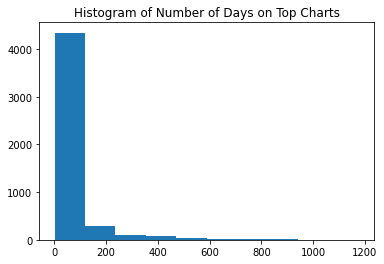

In [26]:
plt.hist(df_grp_songs.ndays)
plt.title('Histogram of Number of Days on Top Charts')
plt.show()

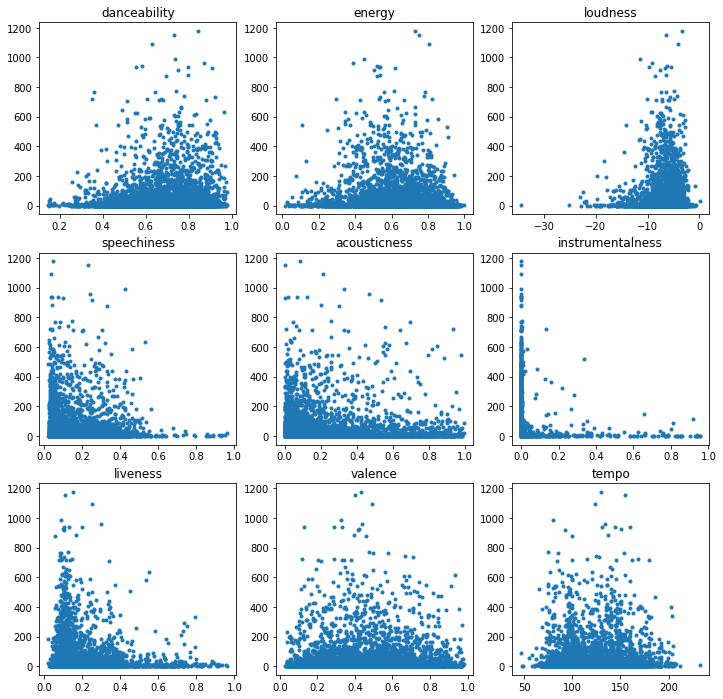

In [25]:
CONT_COLS = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 
             'liveness','valence', 'tempo']
fig, ax = plt.subplots(3,3, figsize = (12,12))
for i, colname in enumerate(CONT_COLS):
    row, col = i//3, i%3
    ax[row,col].plot(df_grp_songs[colname], df_grp_songs['ndays'], '.')
    ax[row,col].set_title(colname)
plt.show()